In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

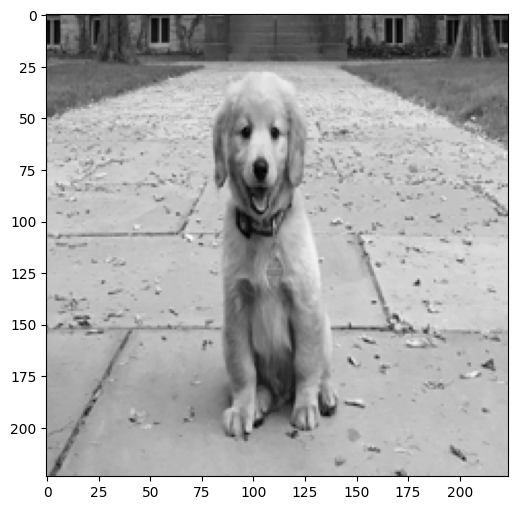

In [5]:
img = Image.open('/Users/riaz/Projects/InterviewPrepGuide/machine_learning/mllib/algo/data/dog.jpg')

img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

In [6]:
#Filter metrics
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [23]:
def calculate_target_size(img_size: int, kernel_size: int, padding: int = 0, stride: int = 1) -> int:
    W = img_size
    F = kernel_size
    P = padding
    S = stride
    target_size = (W - F + 2 * P) / S + 1

    return int(target_size)

In [ ]:
## Testing the above code

In [25]:
# Filter size 3
calculate_target_size(224, 3)

222

In [26]:
# Filter size 5
calculate_target_size(224, 5)

220

In [28]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

In [29]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)
img_sharpened.shape

(222, 222)

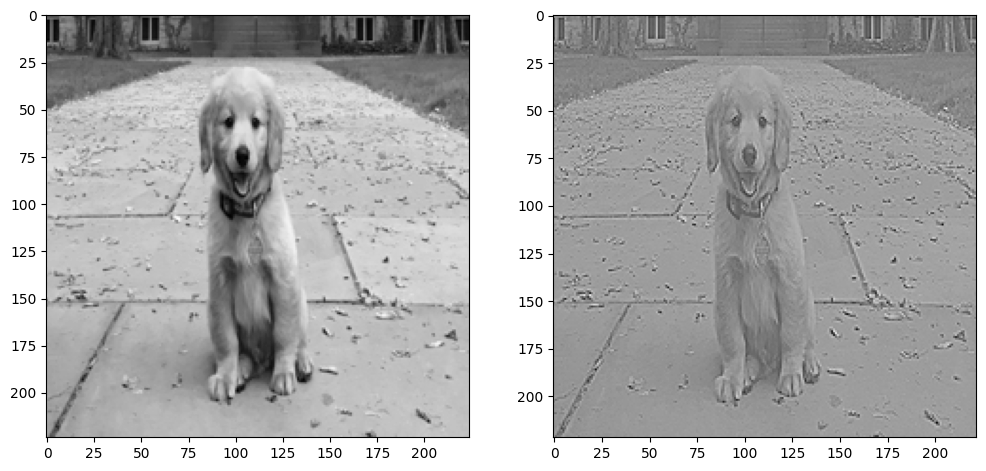

In [30]:
plot_two_images(
    img1=img, 
    img2=img_sharpened
)